<a href="https://colab.research.google.com/github/starlingomez/preworkmac/blob/master/ENERO_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 16.2 MB/s eta 0:00:00


#kevin durant

In [3]:
!pip install nba_api

In [4]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Kevin Durant ID
player_id = '201142'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Kevin Durant ', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023     201142  0022301194  APR 14, 2024    PHX @ MIN  W   38    6   
1       22023     201142  0022301185  APR 12, 2024    PHX @ SAC  W   42   11   
2       22023     201142  0022301165  APR 10, 2024    PHX @ LAC  W   37   10   
3       22023     201142  0022301156  APR 09, 2024  PHX vs. LAC  L   40    8   
4       22023     201142  0022301138  APR 07, 2024  PHX vs. NOP  L   38    8   
5       22023     201142  0022301125  APR 05, 2024  PHX vs. MIN  W   35    9   
6       22023     201142  0022301110  APR 03, 2024  PHX vs. CLE  W   36   13   
7       22023     201142  0022301092  APR 01, 2024    PHX @ NOP  W   41    7   
8       22023     201142  0022301069  MAR 29, 2024    PHX @ OKC  L   31   10   
9       22023     201142  0022301059  MAR 27, 2024    PHX @ DEN  W   38   12   
10      22023     201142  0022301039  MAR 25, 2024    PHX @ SAS  L   36   12   
11      22023     201142  0022301025  MA

<ipython-input-9-8c05a5022354>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:03:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.7273, Precision: 0.7143, Recall: 1.0000, F1-score: 0.8333



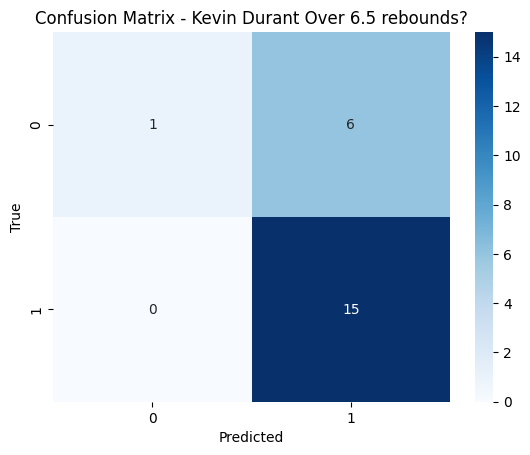

The model predicts that Kevin Durant  will go OVER 6.5 rebounds in today's game.


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Kevin Durant '
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 6.5 rebounds
y = y.apply(lambda x: 1 if x > 4.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Kevin Durant Over 6.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 3.5,   # Average assists
    'STL': 1.0,   # Average steals
    'PTS': 27.4,   # Average points
    'TOV': 2.2,   # Average turnovers
    'FG3M': 1.6,  # Average made 3-point field goals
    'FG3A': 4.6,  # Average attempted 3-point field goals
    'BLK': 2.0    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Kevin Durant  will go OVER 6.5 rebounds in today's game.")
else:
    print("The model predicts that Kevin Durant  will go UNDER 6.5 rebounds in today's game.")


#Devin Booker

In [1]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 2.5 MB/s eta 0:00:00


In [7]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Devin Booker ID
player_id = '1626164'

# Define the seasons and type of games you want to fetch
seasons = ['2022-23', '2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Devin Booker.csv', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22022    1626164  0022201201  APR 06, 2023  PHX vs. DEN  W   37    3   
1       22022    1626164  0022201188  APR 04, 2023  PHX vs. SAS  W   33    9   
2       22022    1626164  0022201172  APR 02, 2023    PHX @ OKC  W   37    8   
3       22022    1626164  0022201160  MAR 31, 2023  PHX vs. DEN  W   35    9   
4       22022    1626164  0022201144  MAR 29, 2023  PHX vs. MIN  W   36    8   
5       22022    1626164  0022201125  MAR 27, 2023    PHX @ UTA  W   34    7   
6       22022    1626164  0022201110  MAR 25, 2023  PHX vs. PHI  W   32    9   
7       22022    1626164  0022201105  MAR 24, 2023    PHX @ SAC  L   33   10   
8       22022    1626164  0022201092  MAR 22, 2023    PHX @ LAL  L   41   11   
9       22022    1626164  0022201064  MAR 19, 2023    PHX @ OKC  L   36   18   
10      22022    1626164  0022201046  MAR 16, 2023  PHX vs. ORL  W   36    7   
11      22022    1626164  0022201033  MA

<ipython-input-8-9aa1eda4f752>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:51:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.5000, Precision: 0.2500, Recall: 0.3000, F1-score: 0.2727



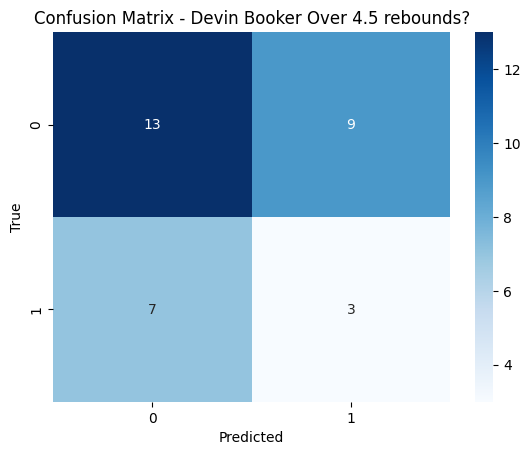

The model predicts that  Devin Booker  will go UNDER 4.5 rebounds in today's game.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Devin Booker.csv'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 6.5 rebounds
y = y.apply(lambda x: 1 if x > 4.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Devin Booker Over 4.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 4.6,   # Average assists
    'STL': 1.6,   # Average steals
    'PTS': 30.8,   # Average points
    'TOV': 3.4,   # Average turnovers
    'FG3M': 3.2,  # Average made 3-point field goals
    'FG3A': 8.0,  # Average attempted 3-point field goals
    'BLK': 0.4    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that  Devin Booker  will go OVER 4.5 rebounds in today's game.")
else:
    print("The model predicts that  Devin Booker  will go UNDER 4.5 rebounds in today's game.")


#Alexandre Sarr

In [16]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Alexandre Sarr ID
player_id = '1642259'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Alexandre Sarr', index=False)


   SEASON_ID Player_ID     Game_ID     GAME_DATE      MATCHUP WL MIN FGM FGA  \
0      22024   1642259  0022400983  JAN 23, 2025    WAS @ LAC  L  28   6  14   
1      22024   1642259  0022400610  JAN 21, 2025    WAS @ LAL  L  27   5  14   
2      22024   1642259  0022400598  JAN 19, 2025    WAS @ SAC  L  22   1   8   
3      22024   1642259  0022400589  JAN 18, 2025    WAS @ GSW  L  30   4  10   
4      22024   1642259  0022400573  JAN 16, 2025  WAS vs. PHX  L  28   7  17   
5      22024   1642259  0022400548  JAN 13, 2025  WAS vs. MIN  L  28   4  10   
6      22024   1642259  0022400545  JAN 12, 2025  WAS vs. OKC  L  25   4   7   
7      22024   1642259  0022400530  JAN 10, 2025    WAS @ CHI  L  26   4  14   
8      22024   1642259  0022400503  JAN 07, 2025  WAS vs. HOU  L  23   1  12   
9      22024   1642259  0022400489  JAN 05, 2025  WAS vs. NOP  L  28   6   9   
10     22024   1642259  0022400472  JAN 03, 2025    WAS @ NOP  L  27   7  13   
11     22024   1642259  0022400456  JAN 

<ipython-input-16-ce3ce9525147>:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_games = pd.concat([all_games, season_df], ignore_index=True)


<ipython-input-20-382c99bca518>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:18:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.6250, Precision: 0.7143, Recall: 0.8333, F1-score: 0.7692



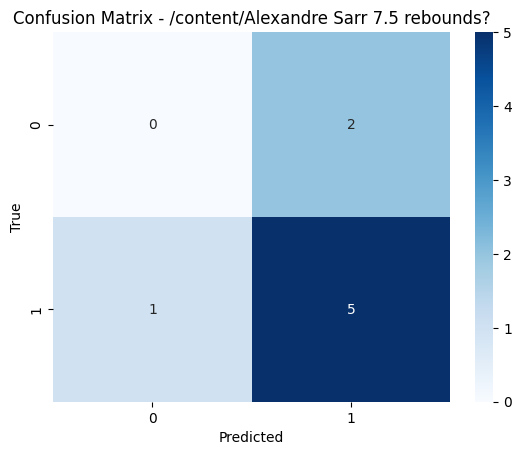

The model predicts that  Alexandre Sarr  will go OVER 7.5 rebounds in today's game.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Alexandre Sarr'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 6.5 rebounds
y = y.apply(lambda x: 1 if x > 5.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - /content/Alexandre Sarr 7.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 1.8,   # Average assists
    'STL': 0.8,   # Average steals
    'PTS': 11.4,   # Average points
    'TOV': 1.0,   # Average turnovers
    'FG3M': 1.4,  # Average made 3-point field goals
    'FG3A': 5.8,  # Average attempted 3-point field goals
    'BLK': 1.6    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that  Alexandre Sarr  will go OVER 7.5 rebounds in today's game.")
else:
    print("The model predicts that Alexandre Sarr  will go UNDER 7.5 rebounds in today's game.")


#Nic claxton

In [2]:
!pip install nba_api

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 kB 3.7 MB/s eta 0:00:00


In [3]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Nic claxton ID
player_id = '1629651'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Nic claxton', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1629651  0022301192  APR 14, 2024    BKN @ PHI  L   20    3   
1       22023    1629651  0022301175  APR 12, 2024    BKN @ NYK  L   36    4   
2       22023    1629651  0022301160  APR 10, 2024  BKN vs. TOR  W   33    6   
3       22023    1629651  0022301128  APR 06, 2024  BKN vs. DET  W   30    2   
4       22023    1629651  0022301106  APR 03, 2024  BKN vs. IND  W   31    7   
5       22023    1629651  0022301089  APR 01, 2024    BKN @ IND  L   26    3   
6       22023    1629651  0022301078  MAR 31, 2024  BKN vs. LAL  L   26    5   
7       22023    1629651  0022301066  MAR 29, 2024  BKN vs. CHI  W   37    4   
8       22023    1629651  0022301050  MAR 27, 2024    BKN @ WAS  W   37    8   
9       22023    1629651  0022301036  MAR 25, 2024    BKN @ TOR  W   35    4   
10      22023    1629651  0022301019  MAR 23, 2024    BKN @ NYK  L   31    2   
11      22023    1629651  0022301007  MA

<ipython-input-7-6e3468f94b2a>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:52:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


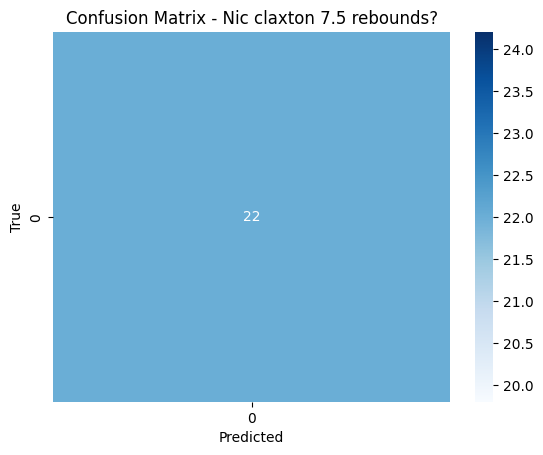

The model predicts that  Nic claxton will go OVER 7.5 rebounds in today's game.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Nic claxton'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 6.5 rebounds
y = y.apply(lambda x: 1 if x > 4.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Nic claxton 7.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 1.6,   # Average assists
    'STL': 1.2,   # Average steals
    'PTS': 7.6,   # Average points
    'TOV': 1.0,   # Average turnovers
    'FG3M': 0.0,  # Average made 3-point field goals
    'FG3A': 0.2,  # Average attempted 3-point field goals
    'BLK': 0.6    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that  Nic claxton will go OVER 7.5 rebounds in today's game.")
else:
    print("The model predicts that Nic claxton  will go UNDER 7.5 rebounds in today's game.")


KYLE OUBRE

In [10]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# KYLE OUBRE ID
player_id = '1626162'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('KYLE OUBRE', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1626162  0022301192  APR 14, 2024  PHI vs. BKN  W   24    3   
1       22023    1626162  0022301171  APR 12, 2024  PHI vs. ORL  W   30    6   
2       22023    1626162  0022301145  APR 09, 2024  PHI vs. DET  W   29    6   
3       22023    1626162  0022301140  APR 07, 2024    PHI @ SAS  W   48   12   
4       22023    1626162  0022301129  APR 06, 2024    PHI @ MEM  W   27    5   
5       22023    1626162  0022301111  APR 04, 2024    PHI @ MIA  W   41    8   
6       22023    1626162  0022301093  APR 02, 2024  PHI vs. OKC  W   37    8   
7       22023    1626162  0022301080  MAR 31, 2024    PHI @ TOR  W   37   10   
8       22023    1626162  0022301067  MAR 29, 2024    PHI @ CLE  L   21    2   
9       22023    1626162  0022301052  MAR 27, 2024  PHI vs. LAC  L   38    6   
10      22023    1626162  0022301028  MAR 24, 2024    PHI @ LAC  W   25    5   
11      22023    1626162  0022301018  MA

<ipython-input-20-9a756cf58dc2>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:07:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.6364, Precision: 0.7333, Recall: 0.7333, F1-score: 0.7333



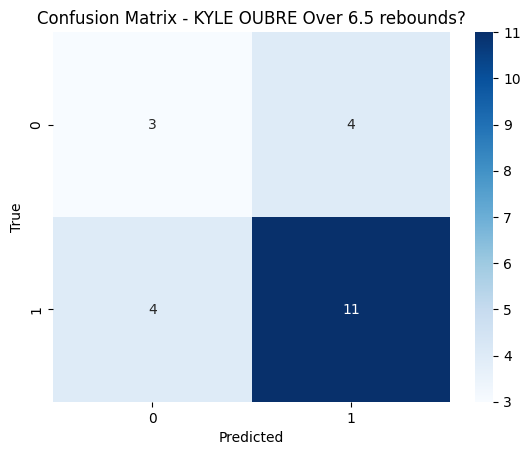

The model predicts that KYLE OUBRE will go UNDER 6.5 rebounds in today's game.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/KYLE OUBRE'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 6.5 rebounds
y = y.apply(lambda x: 1 if x > 3.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KYLE OUBRE Over 6.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 2.4,   # Average assists
    'STL': 1.6,   # Average steals
    'PTS': 16.6,   # Average points
    'TOV': 1.8,   # Average turnovers
    'FG3M': 1.4,  # Average made 3-point field goals
    'FG3A': 3.8,  # Average attempted 3-point field goals
    'BLK': 0.4    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that KYLE OUBRE will go OVER 6.5 rebounds in today's game.")
else:
    print("The model predicts that KYLE OUBRE will go UNDER 6.5 rebounds in today's game.")


#tyrike maxey

In [21]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# TYRISE MAXEY ID
player_id = '1630178'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('TYRISE MAXEY', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1630178  0022301192  APR 14, 2024  PHI vs. BKN  W   29   10   
1       22023    1630178  0022301171  APR 12, 2024  PHI vs. ORL  W   40   10   
2       22023    1630178  0022301140  APR 07, 2024    PHI @ SAS  W   54   19   
3       22023    1630178  0022301129  APR 06, 2024    PHI @ MEM  W   25    2   
4       22023    1630178  0022301111  APR 04, 2024    PHI @ MIA  W   41   15   
5       22023    1630178  0022301067  MAR 29, 2024    PHI @ CLE  L   43    7   
6       22023    1630178  0022301052  MAR 27, 2024  PHI vs. LAC  L   44    9   
7       22023    1630178  0022301042  MAR 25, 2024    PHI @ SAC  L   35   10   
8       22023    1630178  0022301028  MAR 24, 2024    PHI @ LAC  W   44    9   
9       22023    1630178  0022301018  MAR 22, 2024    PHI @ LAL  L   39   10   
10      22023    1630178  0022301002  MAR 20, 2024    PHI @ PHX  L   29    3   
11      22023    1630178  0022300985  MA

<ipython-input-24-c345720c2546>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:12:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.8182, Precision: 0.6667, Recall: 0.4000, F1-score: 0.5000



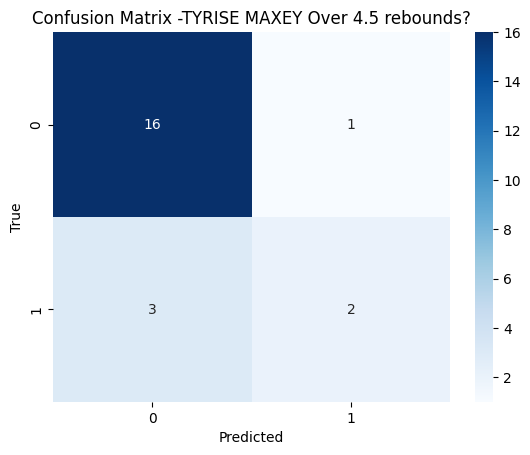

The model predicts that TYRISE MAXEY  will go UNDER 3.5 rebounds in today's game.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/TYRISE MAXEY'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 6.5 rebounds
y = y.apply(lambda x: 1 if x > 4.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -TYRISE MAXEY Over 4.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 6.6,   # Average assists
    'STL': 1.2,   # Average steals
    'PTS': 31.0,   # Average points
    'TOV': 2.0,   # Average turnovers
    'FG3M': 3.4,  # Average made 3-point field goals
    'FG3A': 9.8,  # Average attempted 3-point field goals
    'BLK': 0.6    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that TYRISE MAXEY  will go OVER 3.5 rebounds in today's game.")
else:
    print("The model predicts that TYRISE MAXEY  will go UNDER 3.5 rebounds in today's game.")


#josh hart

In [25]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# josh hart ID
player_id = '1628404'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('josh hart', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1628404  0022301190  APR 14, 2024  NYK vs. CHI  W   40    6   
1       22023    1628404  0022301175  APR 12, 2024  NYK vs. BKN  W   40    6   
2       22023    1628404  0022301167  APR 11, 2024    NYK @ BOS  W   32    7   
3       22023    1628404  0022301149  APR 09, 2024    NYK @ CHI  W   46    6   
4       22023    1628404  0022301139  APR 07, 2024    NYK @ MIL  W   37    2   
5       22023    1628404  0022301119  APR 05, 2024    NYK @ CHI  L   11    0   
6       22023    1628404  0022301112  APR 04, 2024  NYK vs. SAC  W   43   14   
7       22023    1628404  0022301096  APR 02, 2024    NYK @ MIA  L   46    1   
8       22023    1628404  0022301082  MAR 31, 2024  NYK vs. OKC  L   45    4   
9       22023    1628404  0022301070  MAR 29, 2024    NYK @ SAS  L   42    4   
10      22023    1628404  0022301053  MAR 27, 2024    NYK @ TOR  W   34    3   
11      22023    1628404  0022301035  MA

<ipython-input-28-5ed3c0c85ee3>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:20:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.6800, Precision: 0.6429, Recall: 0.7500, F1-score: 0.6923



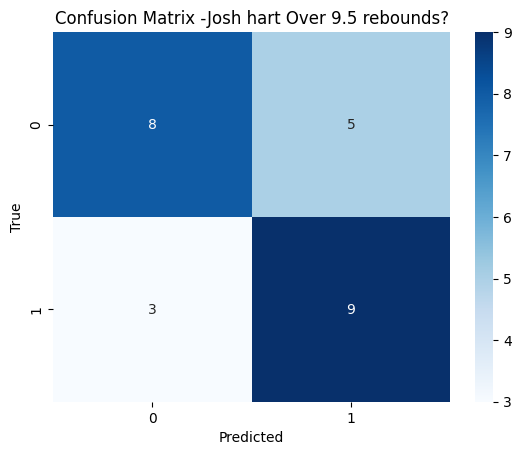

The model predicts that TYRISE MAXEY  will go OVER 9.5 rebounds in today's game.


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/josh hart'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 9.5 rebounds
y = y.apply(lambda x: 1 if x > 8.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Josh hart Over 9.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 6.2,   # Average assists
    'STL': 2.2,   # Average steals
    'PTS': 11.0,   # Average points
    'TOV': 2.2,   # Average turnovers
    'FG3M': 0.6,  # Average made 3-point field goals
    'FG3A': 2.6,  # Average attempted 3-point field goals
    'BLK': 0.0    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that TYRISE MAXEY  will go OVER 9.5 rebounds in today's game.")
else:
    print("The model predicts that TYRISE MAXEY  will go UNDER 9.5 rebounds in today's game.")


#karl town

In [29]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Karl-Anthony Towns ID
player_id = '1626157'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Karl-Anthony Towns', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1626157  0022301194  APR 14, 2024  MIN vs. PHX  L   29    3   
1       22023    1626157  0022301178  APR 12, 2024  MIN vs. ATL  W   28    4   
2       22023    1626157  0022300881  MAR 04, 2024  MIN vs. POR  W   21    5   
3       22023    1626157  0022300873  MAR 03, 2024  MIN vs. LAC  L   34    7   
4       22023    1626157  0022300862  MAR 01, 2024  MIN vs. SAC  L   37    7   
5       22023    1626157  0022300845  FEB 28, 2024  MIN vs. MEM  W   37    5   
6       22023    1626157  0022300815  FEB 24, 2024  MIN vs. BKN  W   36    8   
7       22023    1626157  0022300808  FEB 23, 2024  MIN vs. MIL  L   35    9   
8       22023    1626157  0022300791  FEB 15, 2024    MIN @ POR  W   30    8   
9       22023    1626157  0022300775  FEB 13, 2024    MIN @ POR  W   19    2   
10      22023    1626157  0022300770  FEB 12, 2024    MIN @ LAC  W   27    8   
11      22023    1626157  0022300738  FE

<ipython-input-33-5cc905840aac>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:26:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost - Accuracy: 0.9524, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



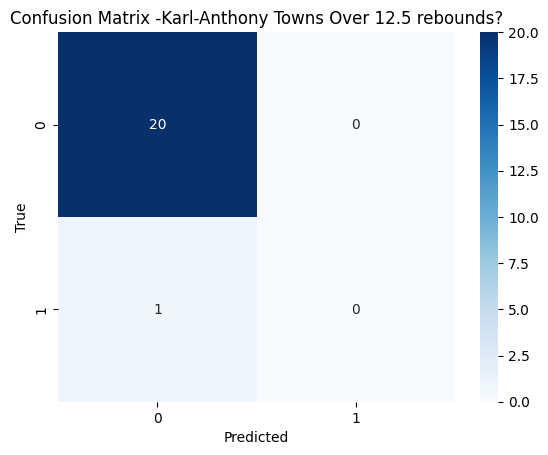

The model predicts that Karl-Anthony Towns  will go UNDER 12.5 rebounds in today's game.


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Karl-Anthony Towns'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 12.5 rebounds
y = y.apply(lambda x: 1 if x > 16.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Karl-Anthony Towns Over 12.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 4.2,   # Average assists
    'STL': 1.2,   # Average steals
    'PTS': 23.4,   # Average points
    'TOV': 3.4,   # Average turnovers
    'FG3M': 1.6,  # Average made 3-point field goals
    'FG3A': 5.0,  # Average attempted 3-point field goals
    'BLK': 0.6    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Karl-Anthony Towns  will go OVER 12.5 rebounds in today's game.")
else:
    print("The model predicts that Karl-Anthony Towns  will go UNDER 12.5 rebounds in today's game.")


#Jakob Poeltl

In [34]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Jakob Poeltl ID
player_id = '1627751'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Jakob Poeltl', index=False)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1627751  0022300875  MAR 03, 2024  TOR vs. CHA  W   15    4   
1      22023    1627751  0022300860  MAR 01, 2024  TOR vs. GSW  L   25    5   
2      22023    1627751  0022300844  FEB 28, 2024  TOR vs. DAL  L   29    7   
3      22023    1627751  0022300829  FEB 26, 2024    TOR @ IND  W   22    7   
4      22023    1627751  0022300804  FEB 23, 2024    TOR @ ATL  W   26    6   
5      22023    1627751  0022300795  FEB 22, 2024  TOR vs. BKN  W   26    3   
6      22023    1627751  0022300782  FEB 14, 2024  TOR vs. IND  L   30    8   
7      22023    1627751  0022300764  FEB 12, 2024  TOR vs. SAS  L   20    5   
8      22023    1627751  0022300756  FEB 10, 2024  TOR vs. CLE  L   21    3   
9      22023    1627751  0022300744  FEB 09, 2024  TOR vs. HOU  W   37    7   
10     22023    1627751  0022300726  FEB 07, 2024    TOR @ CHA  W   33    5   
11     22023    1627751  0022300718  FEB 05, 2024   

<ipython-input-37-6fad5bbd3b4b>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.5556, Precision: 0.6667, Recall: 0.5455, F1-score: 0.6000



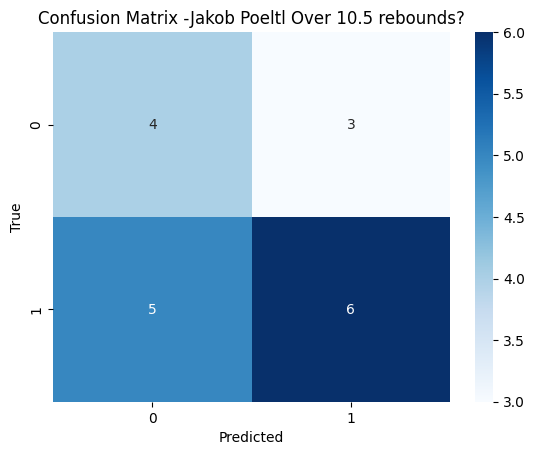

The model predicts that Jakob Poeltl  will go OVER 10.5 rebounds in today's game.


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Jakob Poeltl'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 10.5 rebounds
y = y.apply(lambda x: 1 if x > 9.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Jakob Poeltl Over 10.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 2.2,   # Average assists
    'STL': 0.6,   # Average steals
    'PTS': 13.2,   # Average points
    'TOV': 1.6,   # Average turnovers
    'FG3M': 0.0,  # Average made 3-point field goals
    'FG3A': 0.0,  # Average attempted 3-point field goals
    'BLK': 1.2    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Jakob Poeltl  will go OVER 10.5 rebounds in today's game.")
else:
    print("The model predicts that Jakob Poeltl  will go UNDER 10.5 rebounds in today's game.")


#Scottie Barnes

In [38]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Scottie Barnes ID
player_id = '1630567'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Scottie Barnes', index=False)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1630567  0022300860  MAR 01, 2024  TOR vs. GSW  L   16    4   
1      22023    1630567  0022300844  FEB 28, 2024  TOR vs. DAL  L   39    9   
2      22023    1630567  0022300829  FEB 26, 2024    TOR @ IND  W   38    8   
3      22023    1630567  0022300804  FEB 23, 2024    TOR @ ATL  W   37    8   
4      22023    1630567  0022300795  FEB 22, 2024  TOR vs. BKN  W   31    7   
5      22023    1630567  0022300782  FEB 14, 2024  TOR vs. IND  L   36   12   
6      22023    1630567  0022300764  FEB 12, 2024  TOR vs. SAS  L   30    3   
7      22023    1630567  0022300756  FEB 10, 2024  TOR vs. CLE  L   35    9   
8      22023    1630567  0022300744  FEB 09, 2024  TOR vs. HOU  W   35    4   
9      22023    1630567  0022300726  FEB 07, 2024    TOR @ CHA  W   36    6   
10     22023    1630567  0022300718  FEB 05, 2024    TOR @ NOP  L   25    5   
11     22023    1630567  0022300710  FEB 04, 2024   

<ipython-input-41-dbd6bffa348a>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:43:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.6842, Precision: 0.8571, Recall: 0.7500, F1-score: 0.8000



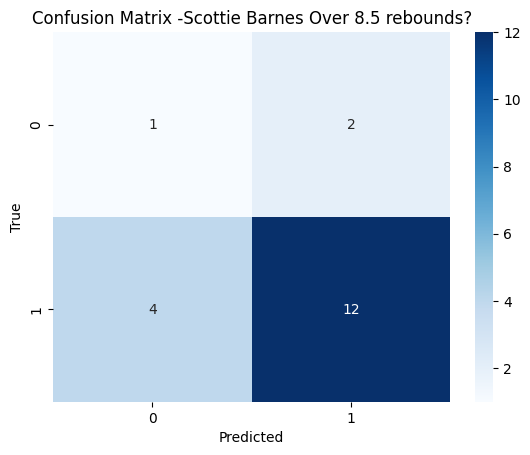

The model predicts that Scottie Barnes  will go OVER 8.5 rebounds in today's game.


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Scottie Barnes'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 8.5 rebounds
y = y.apply(lambda x: 1 if x > 5.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Scottie Barnes Over 8.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 7.2,   # Average assists
    'STL': 1.6,   # Average steals
    'PTS': 18.6,   # Average points
    'TOV': 2.2,   # Average turnovers
    'FG3M': 1.0,  # Average made 3-point field goals
    'FG3A': 4.2,  # Average attempted 3-point field goals
    'BLK': 1.4    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Scottie Barnes  will go OVER 8.5 rebounds in today's game.")
else:
    print("The model predicts that Scottie Barnes  will go UNDER 8.5 rebounds in today's game.")


#daniel Gafford

In [42]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Daniel Gafford ID
player_id = '1629655'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('daniel Gafford', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1629655  0022301181  APR 12, 2024  DAL vs. DET  L   12    3   
1       22023    1629655  0022301161  APR 10, 2024    DAL @ MIA  W   26    6   
2       22023    1629655  0022301144  APR 09, 2024    DAL @ CHA  W   25   12   
3       22023    1629655  0022301131  APR 07, 2024  DAL vs. HOU  W   16    3   
4       22023    1629655  0022301097  APR 05, 2024  DAL vs. GSW  W   31    5   
5       22023    1629655  0022301124  APR 04, 2024  DAL vs. ATL  W   23    3   
6       22023    1629655  0022300589  APR 02, 2024    DAL @ GSW  L   27    5   
7       22023    1629655  0022301083  MAR 31, 2024    DAL @ HOU  W   22    3   
8       22023    1629655  0022301073  MAR 29, 2024    DAL @ SAC  W   24    3   
9       22023    1629655  0022301047  MAR 26, 2024    DAL @ SAC  W   22    5   
10      22023    1629655  0022301041  MAR 25, 2024    DAL @ UTA  W   27    6   
11      22023    1629655  0022301008  MA

<ipython-input-46-84c79a084452>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:51:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost - Accuracy: 0.8333, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



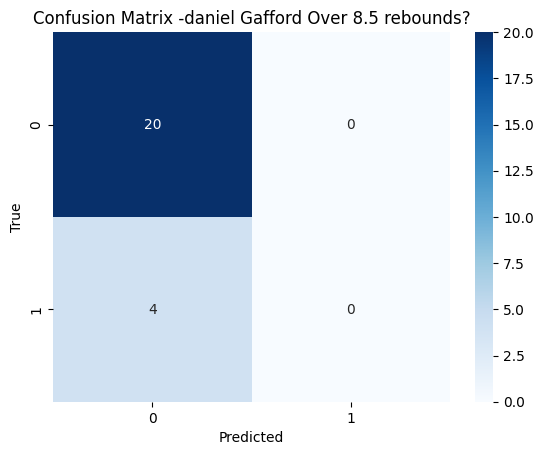

The model predicts that Daniel Gafford   will go UNDER 8.5 rebounds in today's game.


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/daniel Gafford'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 8.5 rebounds
y = y.apply(lambda x: 1 if x > 11.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -daniel Gafford Over 8.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 2.2,   # Average assists
    'STL': 0.8,   # Average steals
    'PTS': 18.4,   # Average points
    'TOV': 2.0,   # Average turnovers
    'FG3M': 0.0,  # Average made 3-point field goals
    'FG3A': 0.0,  # Average attempted 3-point field goals
    'BLK': 3.0    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Daniel Gafford  will go OVER 8.5 rebounds in today's game.")
else:
    print("The model predicts that Daniel Gafford   will go UNDER 8.5 rebounds in today's game.")


#miles bridges

In [47]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Miles Bridges ID
player_id = '1628970'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Miles Bridges', index=False)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1628970  0022301173  APR 12, 2024    CHA @ BOS  L   15    2   
1      22023    1628970  0022301159  APR 10, 2024    CHA @ ATL  W   30    7   
2      22023    1628970  0022301144  APR 09, 2024  CHA vs. DAL  L   36    8   
3      22023    1628970  0022301135  APR 07, 2024  CHA vs. OKC  L   40    7   
4      22023    1628970  0022301115  APR 05, 2024  CHA vs. ORL  W   42    8   
5      22023    1628970  0022301087  APR 01, 2024  CHA vs. BOS  L   43   10   
6      22023    1628970  0022301079  MAR 31, 2024  CHA vs. LAC  L   43   11   
7      22023    1628970  0022301062  MAR 29, 2024  CHA vs. GSW  L   38    8   
8      22023    1628970  0022301048  MAR 27, 2024  CHA vs. CLE  W   41    7   
9      22023    1628970  0022301033  MAR 25, 2024    CHA @ CLE  L   38    5   
10     22023    1628970  0022301021  MAR 23, 2024    CHA @ ATL  L   37   11   
11     22023    1628970  0022300991  MAR 19, 2024   

<ipython-input-50-231f1f734e0d>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.6000, Precision: 0.4545, Recall: 0.7143, F1-score: 0.5556



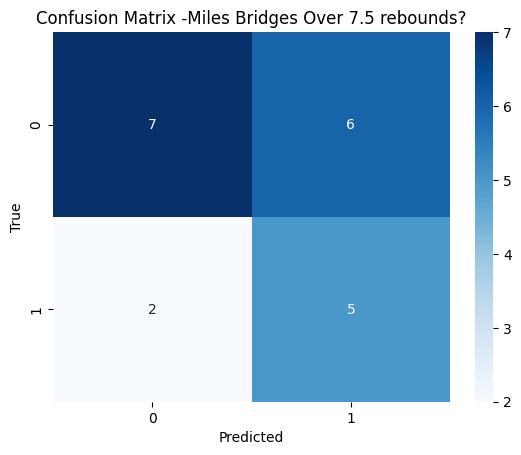

The model predicts that Miles Bridges  will go OVER 7.5 rebounds in today's game.


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Miles Bridges'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 8.5 rebounds
y = y.apply(lambda x: 1 if x > 6.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Miles Bridges Over 7.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 4.0,   # Average assists
    'STL': 0.6,   # Average steals
    'PTS': 21.4,   # Average points
    'TOV': 2.6,   # Average turnovers
    'FG3M': 3.0,  # Average made 3-point field goals
    'FG3A': 6.6,  # Average attempted 3-point field goals
    'BLK': 0.4    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Miles Bridges  will go OVER 7.5 rebounds in today's game.")
else:
    print("The model predicts that Miles Bridges   will go UNDER 7.5 rebounds in today's game.")


#LaMelo Ball

In [51]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# LaMelo Ball ID
player_id = '1630163'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('LaMelo Ball', index=False)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1630163  0022300635  JAN 26, 2024  CHA vs. HOU  L   23    6   
1      22023    1630163  0022300619  JAN 24, 2024    CHA @ DET  L   32    6   
2      22023    1630163  0022300610  JAN 22, 2024    CHA @ MIN  W   35    7   
3      22023    1630163  0022300584  JAN 19, 2024  CHA vs. SAS  W   32   10   
4      22023    1630163  0022300575  JAN 17, 2024    CHA @ NOP  L   31    8   
5      22023    1630163  0022300551  JAN 14, 2024    CHA @ MIA  L   30    9   
6      22023    1630163  0022300541  JAN 12, 2024    CHA @ SAS  L   27    5   
7      22023    1630163  0022300248  NOV 26, 2023    CHA @ ORL  L   15    3   
8      22023    1630163  0022300225  NOV 22, 2023  CHA vs. WAS  W   40   13   
9      22023    1630163  0022300217  NOV 20, 2023  CHA vs. BOS  W   41   15   
10     22023    1630163  0022300202  NOV 18, 2023  CHA vs. NYK  L   36   12   
11     22023    1630163  0022300027  NOV 17, 2023  C

<ipython-input-55-69558f71dafd>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:10:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter t

XGBoost - Accuracy: 1.0000, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



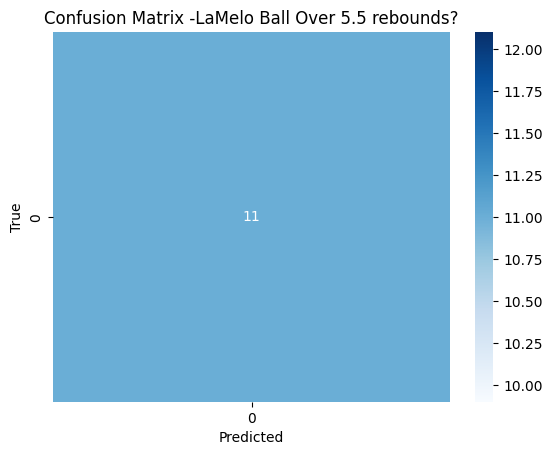

The model predicts that LaMelo Ball   will go UNDER 5.5 rebounds in today's game.


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/LaMelo Ball'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 5.5 rebounds
y = y.apply(lambda x: 1 if x > 8.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -LaMelo Ball Over 5.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 8.8,   # Average assists
    'STL': 1.2,   # Average steals
    'PTS': 24.6,   # Average points
    'TOV': 3.2,   # Average turnovers
    'FG3M': 3.0,  # Average made 3-point field goals
    'FG3A': 10.2,  # Average attempted 3-point field goals
    'BLK': 1.0    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that LaMelo Ball  will go OVER 5.5 rebounds in today's game.")
else:
    print("The model predicts that LaMelo Ball   will go UNDER 5.5 rebounds in today's game.")


#Rudy Gobert

In [56]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Rudy Gobert ID
player_id = '203497'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Rudy Gobert', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023     203497  0022301194  APR 14, 2024  MIN vs. PHX  L   32    7   
1       22023     203497  0022301178  APR 12, 2024  MIN vs. ATL  W   37   10   
2       22023     203497  0022301164  APR 10, 2024    MIN @ DEN  L   39    6   
3       22023     203497  0022301152  APR 09, 2024  MIN vs. WAS  W   38    5   
4       22023     203497  0022301143  APR 07, 2024    MIN @ LAL  W   37    9   
5       22023     203497  0022301125  APR 05, 2024    MIN @ PHX  L   29    2   
6       22023     203497  0022301108  APR 03, 2024  MIN vs. TOR  W   27    3   
7       22023     203497  0022301098  APR 02, 2024  MIN vs. HOU  W   35    4   
8       22023     203497  0022301084  MAR 31, 2024  MIN vs. CHI  L   38    8   
9       22023     203497  0022301071  MAR 29, 2024    MIN @ DEN  W   35    7   
10      22023     203497  0022301056  MAR 27, 2024  MIN vs. DET  W   34    5   
11      22023     203497  0022301031  MA

<ipython-input-60-e6fd06270fb1>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:21:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.7917, Precision: 0.8261, Recall: 0.9500, F1-score: 0.8837



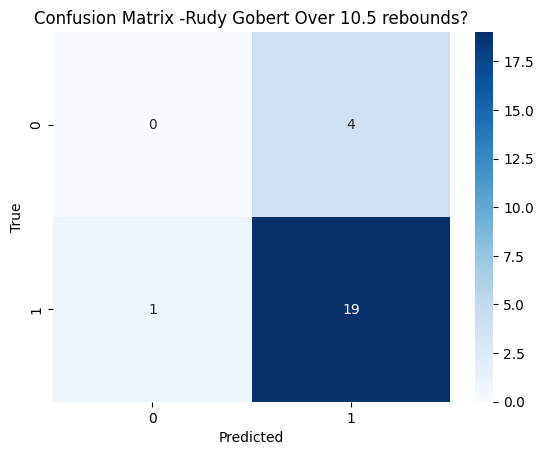

The model predicts that Rudy Gobert will go OVER 10.5 rebounds in today's game.


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Rudy Gobert'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 10.5 rebounds
y = y.apply(lambda x: 1 if x > 7.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Rudy Gobert Over 10.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 1.4,   # Average assists
    'STL': 0.4,   # Average steals
    'PTS': 10.6,   # Average points
    'TOV': 1.2,   # Average turnovers
    'FG3M': 0.0,  # Average made 3-point field goals
    'FG3A': 0.0,  # Average attempted 3-point field goals
    'BLK': 1.6    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Rudy Gobert will go OVER 10.5 rebounds in today's game.")
else:
    print("The model predicts that Rudy Gobert   will go UNDER 10.5 rebounds in today's game.")


#Walker Kessler

In [61]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Walker Kessler ID
player_id = '1631117'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Walker Kessler', index=False)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1631117  0022301100  APR 02, 2024  UTA vs. CLE  L    9    3   
1      22023    1631117  0022301086  MAR 31, 2024    UTA @ SAC  L   32    3   
2      22023    1631117  0022301072  MAR 29, 2024  UTA vs. HOU  L   18    1   
3      22023    1631117  0022301058  MAR 27, 2024  UTA vs. SAS  L   22    1   
4      22023    1631117  0022301041  MAR 25, 2024  UTA vs. DAL  L   17    4   
5      22023    1631117  0022301024  MAR 23, 2024    UTA @ HOU  L   28    5   
6      22023    1631117  0022301008  MAR 21, 2024    UTA @ DAL  L   27    7   
7      22023    1631117  0022301000  MAR 20, 2024    UTA @ OKC  L   23    2   
8      22023    1631117  0022300987  MAR 18, 2024  UTA vs. MIN  L   28    2   
9      22023    1631117  0022300974  MAR 16, 2024  UTA vs. MIN  L   30    3   
10     22023    1631117  0022300966  MAR 15, 2024  UTA vs. ATL  W   26    3   
11     22023    1631117  0022300943  MAR 12, 2024  U

<ipython-input-65-8316936b2d6e>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:31:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost - Accuracy: 0.8500, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



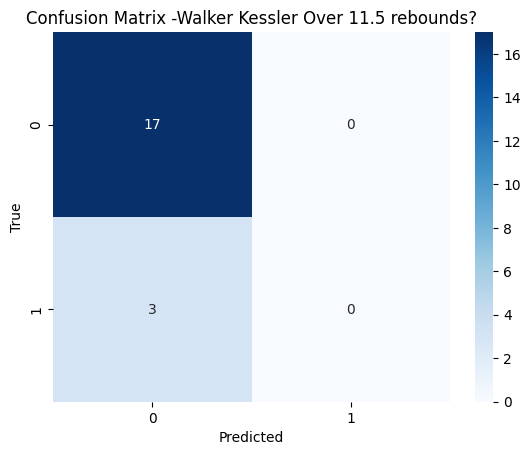

The model predicts that Walker Kessler   will go UNDER 11.5 rebounds in today's game.


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Walker Kessler'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 10.5 rebounds
y = y.apply(lambda x: 1 if x > 13.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Walker Kessler Over 11.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 0.8,   # Average assists
    'STL': 0.2,   # Average steals
    'PTS': 14.4,   # Average points
    'TOV': 1.0,   # Average turnovers
    'FG3M': 0.0,  # Average made 3-point field goals
    'FG3A': 0.2,  # Average attempted 3-point field goals
    'BLK': 1.8    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Walker Kessler will go OVER 11.5 rebounds in today's game.")
else:
    print("The model predicts that Walker Kessler   will go UNDER 11.5 rebounds in today's game.")


#Lauri Markkanen

In [66]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Lauri Markkanen ID
player_id = '1628374'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Lauri Markkanen', index=False)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1628374  0022301058  MAR 27, 2024  UTA vs. SAS  L   42    8   
1      22023    1628374  0022301041  MAR 25, 2024  UTA vs. DAL  L   34   10   
2      22023    1628374  0022301008  MAR 21, 2024    UTA @ DAL  L   36    6   
3      22023    1628374  0022300987  MAR 18, 2024  UTA vs. MIN  L   31    8   
4      22023    1628374  0022300867  MAR 02, 2024    UTA @ MIA  L   41    5   
5      22023    1628374  0022300850  FEB 29, 2024    UTA @ ORL  L   34    6   
6      22023    1628374  0022300835  FEB 27, 2024    UTA @ ATL  L   26    4   
7      22023    1628374  0022300825  FEB 25, 2024  UTA vs. SAS  W   32   10   
8      22023    1628374  0022300801  FEB 22, 2024  UTA vs. CHA  L   37    5   
9      22023    1628374  0022300576  FEB 15, 2024  UTA vs. GSW  L   34    6   
10     22023    1628374  0022300788  FEB 14, 2024  UTA vs. LAL  L   34    6   
11     22023    1628374  0022300769  FEB 12, 2024  U

<ipython-input-70-3d597b76588e>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:29:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.6667, Precision: 0.5000, Recall: 0.6667, F1-score: 0.5714



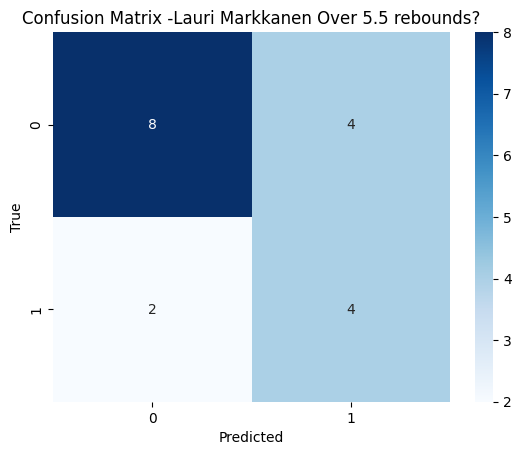

The model predicts that Lauri Markkanen   will go UNDER 5.5 rebounds in today's game.


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '//content/Lauri Markkanen'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 5.5 rebounds
y = y.apply(lambda x: 1 if x > 8.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Lauri Markkanen Over 5.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 1.4,   # Average assists
    'STL': 1.0,   # Average steals
    'PTS': 22.8,   # Average points
    'TOV': 1.0,   # Average turnovers
    'FG3M': 4.4,  # Average made 3-point field goals
    'FG3A': 11.6,  # Average attempted 3-point field goals
    'BLK': 1.8    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Lauri Markkanen will go OVER 5.5 rebounds in today's game.")
else:
    print("The model predicts that Lauri Markkanen   will go UNDER 5.5 rebounds in today's game.")


#Jarrett Allen

In [73]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Jarrett Allen ID
player_id = '1628386'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Jarrett Allen', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1628386  0022301187  APR 14, 2024  CLE vs. CHA  L   23    7   
1       22023    1628386  0022301174  APR 12, 2024  CLE vs. IND  W   38   13   
2       22023    1628386  0022301158  APR 10, 2024  CLE vs. MEM  W   34    7   
3       22023    1628386  0022301132  APR 07, 2024    CLE @ LAC  L   35    6   
4       22023    1628386  0022301127  APR 06, 2024    CLE @ LAL  L   34    6   
5       22023    1628386  0022301110  APR 03, 2024    CLE @ PHX  L   37    9   
6       22023    1628386  0022301100  APR 02, 2024    CLE @ UTA  W   33    8   
7       22023    1628386  0022301077  MAR 31, 2024    CLE @ DEN  L   27    9   
8       22023    1628386  0022301067  MAR 29, 2024  CLE vs. PHI  W   26    6   
9       22023    1628386  0022301048  MAR 27, 2024    CLE @ CHA  L   34   11   
10      22023    1628386  0022301033  MAR 25, 2024  CLE vs. CHA  W   33    7   
11      22023    1628386  0022301029  MA

<ipython-input-77-d639dbdb9d26>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:37:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.5600, Precision: 0.6316, Recall: 0.7500, F1-score: 0.6857



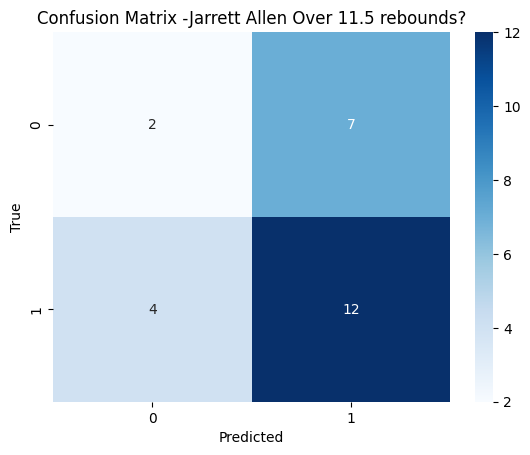

The model predicts that Jarrett Allen will go OVER 11.5 rebounds in today's game.


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Jarrett Allen'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 5.5 rebounds
y = y.apply(lambda x: 1 if x > 8.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Jarrett Allen Over 11.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 1.4,   # Average assists
    'STL': 0.6,   # Average steals
    'PTS': 12.8,   # Average points
    'TOV': 2.0,   # Average turnovers
    'FG3M': 0.0,  # Average made 3-point field goals
    'FG3A': 0.0,  # Average attempted 3-point field goals
    'BLK': 1.0    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Jarrett Allen will go OVER 11.5 rebounds in today's game.")
else:
    print("The model predicts that Jarrett Allen   will go UNDER 11.5 rebounds in today's game.")


#Giannis Antetokounmpo

In [78]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Giannis Antetokounmpo ID
player_id = '203507'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Giannis Antetokounmpo.csv', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023     203507  0022301148  APR 09, 2024  MIL vs. BOS  W   29    7   
1       22023     203507  0022301139  APR 07, 2024  MIL vs. NYK  L   39   10   
2       22023     203507  0022301107  APR 03, 2024  MIL vs. MEM  L   32   10   
3       22023     203507  0022301095  APR 02, 2024    MIL @ WAS  L   36   15   
4       22023     203507  0022301076  MAR 30, 2024    MIL @ ATL  W   38   12   
5       22023     203507  0022301061  MAR 28, 2024    MIL @ NOP  L   39   15   
6       22023     203507  0022301045  MAR 26, 2024  MIL vs. LAL  L   46   14   
7       22023     203507  0022301030  MAR 24, 2024  MIL vs. OKC  W   34   13   
8       22023     203507  0022301007  MAR 21, 2024  MIL vs. BKN  W   35    9   
9       22023     203507  0022300958  MAR 14, 2024  MIL vs. PHI  W   37    9   
10      22023     203507  0022300945  MAR 12, 2024    MIL @ SAC  L   33   10   
11      22023     203507  0022300924  MA

<ipython-input-82-2e6adb2274a2>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:43:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.8182, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



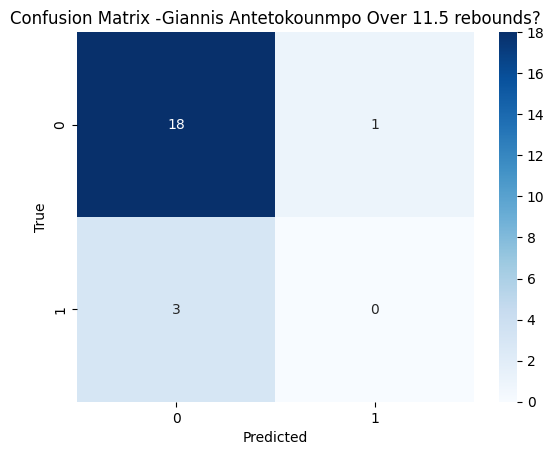

The model predicts that Giannis Antetokounmpo  will go UNDER 11.5 rebounds in today's game.


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Giannis Antetokounmpo.csv'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 5.5 rebounds
y = y.apply(lambda x: 1 if x > 14.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Giannis Antetokounmpo Over 11.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 6.0,   # Average assists
    'STL': 0.4,   # Average steals
    'PTS': 30.6,   # Average points
    'TOV': 3.2,   # Average turnovers
    'FG3M': 0.0,  # Average made 3-point field goals
    'FG3A': 0.6,  # Average attempted 3-point field goals
    'BLK': 1.2    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Giannis Antetokounmpo will go OVER 11.5 rebounds in today's game.")
else:
    print("The model predicts that Giannis Antetokounmpo  will go UNDER 11.5 rebounds in today's game.")


#Brook Lopez

In [83]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# Brook Lopez ID
player_id = '201572'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('Brook Lopez', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023     201572  0022301191  APR 14, 2024    MIL @ ORL  L   28    4   
1       22023     201572  0022301179  APR 12, 2024    MIL @ OKC  L   23    7   
2       22023     201572  0022301162  APR 10, 2024  MIL vs. ORL  W   31    4   
3       22023     201572  0022301148  APR 09, 2024  MIL vs. BOS  W   28    5   
4       22023     201572  0022301139  APR 07, 2024  MIL vs. NYK  L   29    4   
5       22023     201572  0022301122  APR 05, 2024  MIL vs. TOR  L   20    6   
6       22023     201572  0022301107  APR 03, 2024  MIL vs. MEM  L   38    9   
7       22023     201572  0022301095  APR 02, 2024    MIL @ WAS  L   26    3   
8       22023     201572  0022301076  MAR 30, 2024    MIL @ ATL  W   33    3   
9       22023     201572  0022301061  MAR 28, 2024    MIL @ NOP  L   37    2   
10      22023     201572  0022301045  MAR 26, 2024  MIL vs. LAL  L   33    4   
11      22023     201572  0022301030  MA

<ipython-input-87-5ca945f3c451>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:51:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.4800, Precision: 0.5625, Recall: 0.6000, F1-score: 0.5806



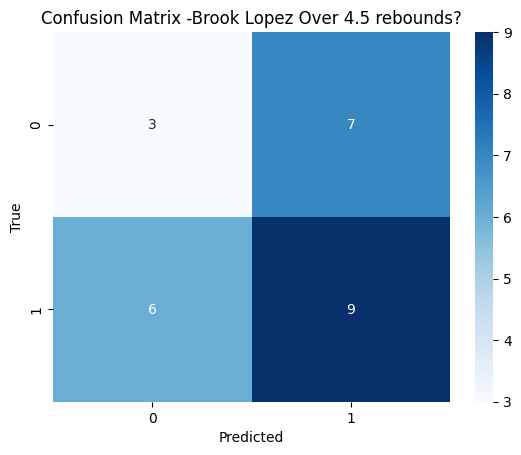

The model predicts that Brook Lopez will go OVER 4.5 rebounds in today's game.


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/Brook Lopez'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 4.5 rebounds
y = y.apply(lambda x: 1 if x > 4.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -Brook Lopez Over 4.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 2.6,   # Average assists
    'STL': 0.4,   # Average steals
    'PTS': 13.2,   # Average points
    'TOV': 0.8,   # Average turnovers
    'FG3M': 1.4,  # Average made 3-point field goals
    'FG3A': 3.6,  # Average attempted 3-point field goals
    'BLK': 2.4    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that Brook Lopez will go OVER 4.5 rebounds in today's game.")
else:
    print("The model predicts that Brook Lopez  will go UNDER 4.5 rebounds in today's game.")


# bobby portis

In [88]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# bobby portis ID
player_id = '1626171'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('bobby portis.csv', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1626171  0022301191  APR 14, 2024    MIL @ ORL  L   31    6   
1       22023    1626171  0022301179  APR 12, 2024    MIL @ OKC  L   21    2   
2       22023    1626171  0022301162  APR 10, 2024  MIL vs. ORL  W   30   14   
3       22023    1626171  0022301148  APR 09, 2024  MIL vs. BOS  W   22    7   
4       22023    1626171  0022301139  APR 07, 2024  MIL vs. NYK  L   29   10   
5       22023    1626171  0022301122  APR 05, 2024  MIL vs. TOR  L   28    8   
6       22023    1626171  0022301107  APR 03, 2024  MIL vs. MEM  L   28    8   
7       22023    1626171  0022301095  APR 02, 2024    MIL @ WAS  L   25    6   
8       22023    1626171  0022301076  MAR 30, 2024    MIL @ ATL  W   21    6   
9       22023    1626171  0022301061  MAR 28, 2024    MIL @ NOP  L   16    2   
10      22023    1626171  0022301045  MAR 26, 2024  MIL vs. LAL  L   30    7   
11      22023    1626171  0022301030  MA

In [ ]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# bobby portis ID
player_id = '1626171'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('bobby portis.csv', index=False)


    SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0       22023    1626171  0022301191  APR 14, 2024    MIL @ ORL  L   31    6   
1       22023    1626171  0022301179  APR 12, 2024    MIL @ OKC  L   21    2   
2       22023    1626171  0022301162  APR 10, 2024  MIL vs. ORL  W   30   14   
3       22023    1626171  0022301148  APR 09, 2024  MIL vs. BOS  W   22    7   
4       22023    1626171  0022301139  APR 07, 2024  MIL vs. NYK  L   29   10   
5       22023    1626171  0022301122  APR 05, 2024  MIL vs. TOR  L   28    8   
6       22023    1626171  0022301107  APR 03, 2024  MIL vs. MEM  L   28    8   
7       22023    1626171  0022301095  APR 02, 2024    MIL @ WAS  L   25    6   
8       22023    1626171  0022301076  MAR 30, 2024    MIL @ ATL  W   21    6   
9       22023    1626171  0022301061  MAR 28, 2024    MIL @ NOP  L   16    2   
10      22023    1626171  0022301045  MAR 26, 2024  MIL vs. LAL  L   30    7   
11      22023    1626171  0022301030  MA

<ipython-input-91-85a925f59817>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:57:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.6800, Precision: 0.7619, Recall: 0.8421, F1-score: 0.8000



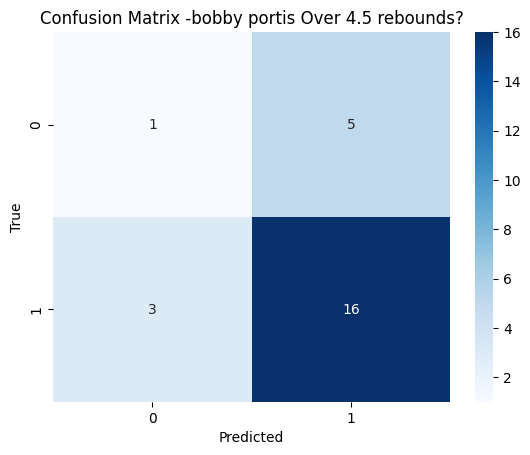

The model predicts that bobby portis will go OVER 7.5 rebounds in today's game.


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/bobby portis.csv'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 4.5 rebounds
y = y.apply(lambda x: 1 if x > 5.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -bobby portis Over 4.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 0,  # 1 for home, 0 for away
    'AST': 1.4,   # Average assists
    'STL': 0.0,   # Average steals
    'PTS': 11.8,   # Average points
    'TOV': 1.2,   # Average turnovers
    'FG3M': 0.6,  # Average made 3-point field goals
    'FG3A': 2.6,  # Average attempted 3-point field goals
    'BLK': 0.4    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that bobby portis will go OVER 7.5 rebounds in today's game.")
else:
    print("The model predicts that bobby portis will go UNDER 7.5 rebounds in today's game.")


#PAOLO BANCHERO

In [93]:
from nba_api.stats.endpoints import playergamelog
import pandas as pd

# PAOLO BANCHERO ID
player_id = '1631094'

# Define the seasons and type of games you want to fetch
seasons = ['2023-24', '2024-25']  # Add more seasons if needed
season_type = 'Regular Season'  # Options: 'Regular Season', 'Playoffs', 'Pre Season', 'All-Star'

# Initialize an empty DataFrame to store all games
all_games = pd.DataFrame()

# Loop through each season and fetch game logs
for season in seasons:
    # Fetch the game log for the given season
    gamelog = playergamelog.PlayerGameLog(player_id=player_id, season=season, season_type_all_star=season_type)

    # Convert the response to a pandas DataFrame
    season_df = gamelog.get_data_frames()[0]

    # Append the data to the main DataFrame
    all_games = pd.concat([all_games, season_df], ignore_index=True)

# Set pandas display options to show all rows
pd.set_option('display.max_rows', None)

# Display the complete DataFrame
print(all_games)

# Optionally save the data to a CSV file
all_games.to_csv('PAOLO BANCHERO', index=False)


   SEASON_ID  Player_ID     Game_ID     GAME_DATE      MATCHUP WL  MIN  FGM  \
0      22023    1631094  0022301191  APR 14, 2024  ORL vs. MIL  W   35    8   
1      22023    1631094  0022301171  APR 12, 2024    ORL @ PHI  L   41    7   
2      22023    1631094  0022301162  APR 10, 2024    ORL @ MIL  L   34    7   
3      22023    1631094  0022301150  APR 09, 2024    ORL @ HOU  L   36    7   
4      22023    1631094  0022301136  APR 07, 2024  ORL vs. CHI  W   36    8   
5      22023    1631094  0022301115  APR 05, 2024    ORL @ CHA  L   40   10   
6      22023    1631094  0022301109  APR 03, 2024    ORL @ NOP  W   38   10   
7      22023    1631094  0022301090  APR 01, 2024  ORL vs. POR  W   36    6   
8      22023    1631094  0022301075  MAR 30, 2024  ORL vs. MEM  W   30    5   
9      22023    1631094  0022301064  MAR 29, 2024  ORL vs. LAC  L   38    8   
10     22023    1631094  0022301049  MAR 27, 2024  ORL vs. GSW  L   32    5   
11     22023    1631094  0022301020  MAR 23, 2024  O

<ipython-input-98-1ba9a955e8da>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:13:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000



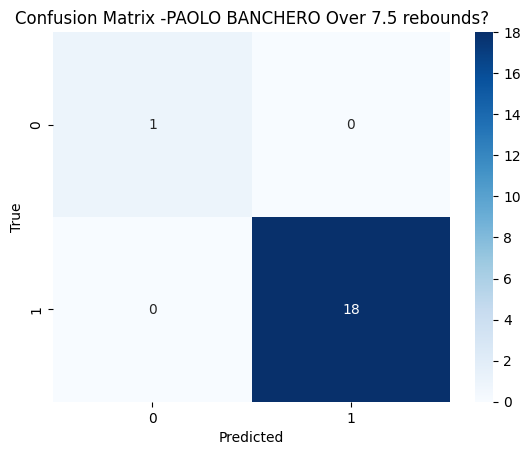

The model predicts that PAOLO BANCHERO will go OVER 7.5 rebounds in today's game.


In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------
# Load and preprocess the data
# ---------------------------
filepath = '/content/PAOLO BANCHERO'
data = pd.read_csv(filepath)

data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Create a 'HOME' feature
data['HOME'] = data['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

# Create an 'OPPONENT' feature (not used directly in the XGBoost, but kept here if needed)
data['OPPONENT'] = data['MATCHUP'].apply(lambda x: x.split()[-1])

# Define features and target
features = ['HOME', 'AST', 'STL', 'PTS', 'TOV', 'FG3M', 'FG3A', 'BLK']
target = 'REB'

X = data[features]
y = data[target]

# Binarize the target variable based on the threshold of 4.5 rebounds
y = y.apply(lambda x: 1 if x > 3.5 else 0)

# ---------------------------
# Train-test split
# ---------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------
# Initialize and train XGBoost Classifier
# ---------------------------
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# ---------------------------
# Make predictions and evaluate
# ---------------------------
predictions = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"XGBoost - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

# ---------------------------
# Confusion matrix
# ---------------------------
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix -PAOLO BANCHERO Over 7.5 rebounds?')
plt.show()

# ---------------------------
# Predict today's game outcome
# ---------------------------
today_game = {
    'HOME': 1,  # 1 for home, 0 for away
    'AST': 3.8,   # Average assists
    'STL': 0.4,   # Average steals
    'PTS': 17.4,   # Average points
    'TOV': 4.0,   # Average turnovers
    'FG3M': 1.0,  # Average made 3-point field goals
    'FG3A': 4.4,  # Average attempted 3-point field goals
    'BLK': 1.0    # Average blocks
}

today_game_df = pd.DataFrame([today_game])
today_game_prediction = xgb_model.predict(today_game_df)

if today_game_prediction[0] == 1:
    print("The model predicts that PAOLO BANCHERO will go OVER 7.5 rebounds in today's game.")
else:
    print("The model predicts that PAOLO BANCHERO will go UNDER 7.5 rebounds in today's game.")
